<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/digit-classification-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [166]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)

len(x_test)

x_train[0].shape

(28, 28)

In [167]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

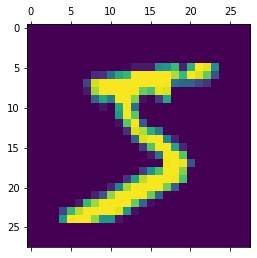

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[0]

5

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4683 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9255


In [14]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2655 - accuracy: 0.9260


[0.2655077576637268, 0.9259999990463257]

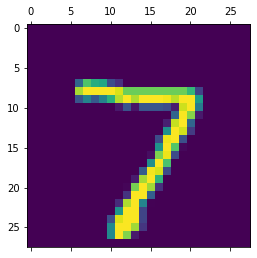

In [15]:
plt.matshow(x_test[0])

In [16]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]


313/313 [==============================] - 0s 1ms/step


array([2.3126760e-02, 3.2110387e-07, 5.8103964e-02, 9.5957524e-01,
       1.8900342e-03, 1.0240227e-01, 1.6758353e-06, 9.9974561e-01,
       1.0538416e-01, 6.5710604e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  921,   18,    7,    5,   12,    9,   42,    4],
       [   4,    0,   17,  916,    0,   26,    2,   10,   29,    6],
       [   2,    1,    5,    2,  912,    0,    8,    4,   10,   38],
       [  10,    3,    3,   29,    8,  784,   12,    5,   32,    6],
       [  13,    3,   10,    1,    8,   15,  902,    2,    4,    0],
       [   1,    5,   20,    8,    7,    0,    0,  949,    4,   34],
       [   8,    7,    6,   18,    9,   25,    8,   12,  875,    6],
       [  10,    7,    1,    9,   23,    6,    0,   21,   10,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

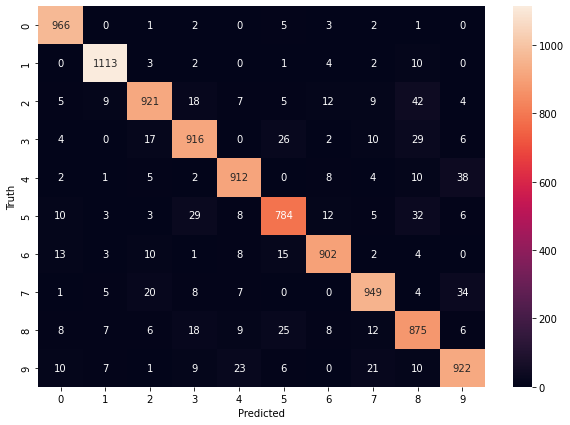

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1225 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0855 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9839


In [22]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9770


[0.0776592493057251, 0.9769999980926514]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

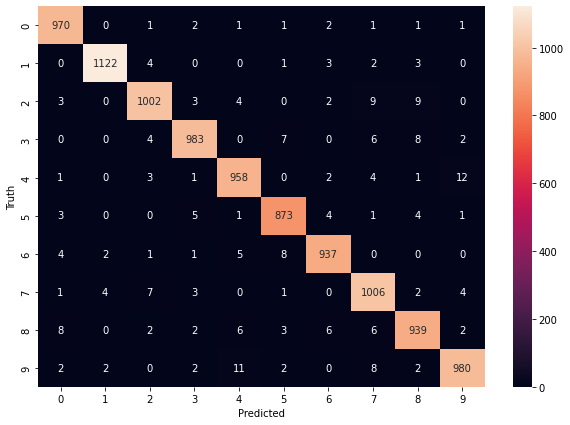

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
# Flattening data using keras Flatten class
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# model.fit(x_train_flattened, y_train, epochs=5)

In [26]:

def f1_score(y_true, y_pred):
    """Computes the F1 score"""
    true_positives = tf.math.count_nonzero(y_pred * y_true, dtype=tf.float32)
    false_positives = tf.math.count_nonzero(y_pred * (y_true - 1), dtype=tf.float32)
    false_negatives = tf.math.count_nonzero((y_pred - 1) * y_true, dtype=tf.float32)
    
    precision = true_positives / (true_positives + false_positives + 1e-8)
    recall = true_positives / (true_positives + false_negatives + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)
    
    return f1, precision, recall


In [27]:
# from sklearn.metrics import f1_score

In [28]:
print(y_predicted[0])

[1.2264169e-02 1.0759480e-04 1.4228240e-01 9.2900211e-01 6.1879844e-05
 2.0752391e-01 1.8812295e-07 9.9997240e-01 1.5360437e-01 1.7877400e-01]


In [29]:
y_true = tf.constant([1, 1, 1, 1])
y_pred = tf.constant([0, 1, 0, 0])

f1, precision, recall = f1_score(y_true, y_pred)

print("F1 score:", f1.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())


F1 score: 0.4
Precision: 1.0
Recall: 0.25


In [30]:
x_train.shape


(60000, 28, 28)

In [184]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split the dataset into training and testing sets
# Flatten the input images
# x_train = np.reshape(x_train, (x_train.shape[0], -1))

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# X_test = np.reshape(X_test, (X_test.shape[0], -1))

# Train a classifier on the training set
# ...
# Train a logistic regression classifier on the training set
# clf = LogisticRegression(random_state=42)
# clf.fit(x_train, y_train)

# Flattening data using keras Flatten class
clf = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

clf.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

clf.fit(x_train, y_train)
# Make predictions on the validation set
y_pred = clf.predict(x_val)

# Calculate the F1 score
# for i in range(255):
f1 = f1_score(y_val.astype(int), y_pred[0][:8].astype(int), average='macro')
# Calculate the precision and recall
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
# Generate a classification report
report = classification_report(y_val, y_pred)
print(report)
# Generate a confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("hii", f1)

11/11 [==============================] - 0s 3ms/step


ValueError: ignored

In [161]:
y_pred[0][:8].astype(int)

array([0, 0, 0, 1, 1, 1, 0, 0])

In [144]:
y_val.astype(int)

array([6, 9, 2, 5, 4, 9, 4, 0])

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a classifier on the training set
# ...
# Train a logistic regression classifier on the training set
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Calculate the F1 score
for i in range(25):
  f1 = f1_score(y_val, y_pred, average='macro')
  
# Calculate the precision and recall
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)
# Generate a classification report
report = classification_report(y_val, y_pred)
print(report)
# Generate a confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

print("hii", f1)

In [185]:
import tensorflow as tf
from sklearn.metrics import classification_report

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the sequential classifier model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='micro')
recall = recall_score(y_test, y_pred_classes, average='micro')
f1 = f1_score(y_test, y_pred_classes, average='micro')

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Print classification report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, y_pred_classes, target_names=target_names))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2984 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1422 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0885 - accuracy: 0.9727
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Precision: 0.9782
Recall: 0.9782
F1 score: 0.9782
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.98      0.98      0.98      1032
     class 3       0.97      0.98      0.97      1010
     class 4       0.97      0.98      0.98       982
     class 5       0.98      0.97      0.97       892
     class 6       0.99      0.97      0.98       958
     class 7       0.97      0.98      0.97    